# <span style="color:darkblue"> Lecture 22 - Advanced Plots 2  </span>

<font size = "5">

In previous lectures we ...

- Worked with the "subplots()" environment which expands <br>
  the functionality of "scatter","hist","line" and similar <br>
  syntax to ```plt.```
- Explored options for axis labelling 

In this lecture we will focus on the standard "plt" usage and ...

- Export graphs to files
- Plot grouped statistics
- Change the style theme
- Everything today is also compatible with ```.subplots()```



# <span style="color:darkblue"> I. Setup working environment  </span>

<font size = "5">

Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

<font size = "5">

Import data

In [2]:
cars = pd.read_csv("data_raw/cars.csv")

# Source: "https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv"

# <span style="color:darkblue"> II. Exporting and Organization </span>

<font size = "5">

Maintain an organized folder

- Differentiate raw/clean data, figures, results, etc...
- Essential for data quality
- Easier to handle big projects

$\qquad$ <img src="figures/folder_structure.png" alt="drawing" width="300"/>

<font size = "5">

Export to file

In [3]:
cars

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


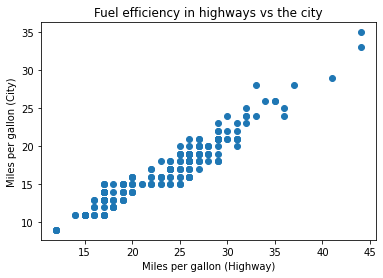

In [6]:
plt.scatter(x = cars["hwy"],y = cars["cty"])
plt.xlabel("Miles per gallon (Highway)")
plt.ylabel("Miles per gallon (City)")
plt.title("Fuel efficiency in highways vs the city")

# Store in different formats - saving the figure
plt.savefig("results/scatter_cty_hwy.png")
plt.savefig("results/scatter_cty_hwy.jpg")
plt.savefig("results/scatter_cty_hwy_4_16_25.jpg")

<font size = "5">

Pro Tips:

- **CHOOSE** self-explanatory names!
- **INCLUDE** time stamps or other systematic notation,
  <br> e.g. "2023-04-26-scatter_cars.png" <br>
- **AVOID** ambiguous notation like "scatter_cars_v4.png" 
- If working on a report, add figure numbers to file


<font size = "5">

Try it yourself!

- Store the above figure, with today's date <br>
in the file name as a "jpg" file
- Check that the file appears in your folder

In [ ]:
# Write your own code

#see above code chunk


<Figure size 432x288 with 0 Axes>

# <span style="color:darkblue"> III. Plotting Grouped Data  </span>

<font size = "5">

Adding group indexing

In [7]:
cars

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [8]:
cars.groupby(['year'])["displ"]

In [9]:
# .groupby() adds a grouping index that can be used for grouped plotting
# ["..."] extracts a particular column from the dataset.
# Note: It's not always necessary to compute summary statistics after .groupby()

grouped_data = cars.groupby(['year'])["displ"]

<font size = "5">

Grouped statistics

In [10]:
# Compute frequency
grouped_counts_onelevel = cars.groupby(['class']).size()
grouped_counts_multilevel = cars.groupby(['class','cyl']).size()

# Compute summary statistics by group
grouped_mean = cars.groupby(['class','manufacturer'])["displ"].mean()
grouped_sum = cars.groupby(['class','manufacturer'])["displ"].sum()
grouped_std = cars.groupby(['class','manufacturer'])["displ"].std()
grouped_min = cars.groupby(['class','manufacturer'])["displ"].min()
grouped_max = cars.groupby(['class','manufacturer'])["displ"].max()

# Note: (1) Python will store the index in ".groupby()" for later plotting
#       (2) This is a succinct syntax for computing a single statistic.
#           More multiple statistics and/or custom names  use ".groupby().agg()"


<AxesSubplot:xlabel='manufacturer'>

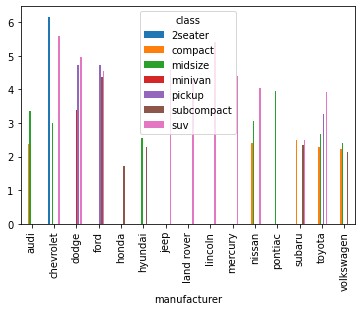

In [11]:
grouped_mean.unstack("class").plot(kind = "bar",stacked = False)

<font size = "5">

Histogram by groups

In [12]:
grouped_data

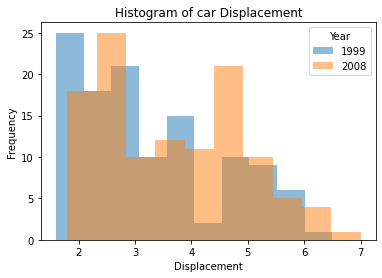

In [13]:
# To create overlapping histograms, use the "grouped_data" created above
# and the function ".plot.hist()" 
# The option "alpha" controls the transparency

grouped_data.plot.hist(alpha = 0.5)
plt.xlabel("Displacement")
plt.ylabel("Frequency")
plt.title("Histogram of car Displacement")
plt.legend(title = "Year")

<font size = "5">

Bar chart

In [14]:
grouped_counts_onelevel

class
2seater        5
compact       47
midsize       41
minivan       11
pickup        33
subcompact    35
suv           62
dtype: int64

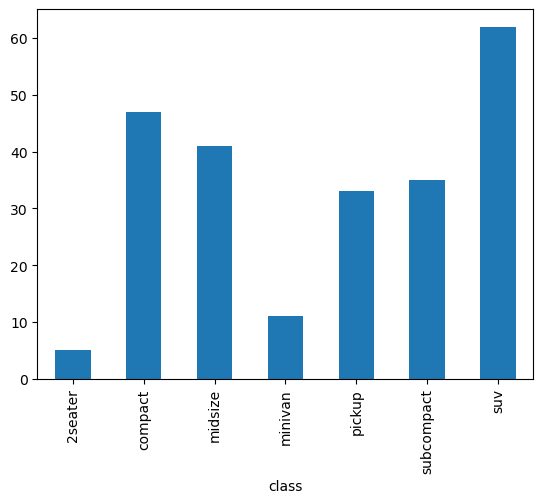

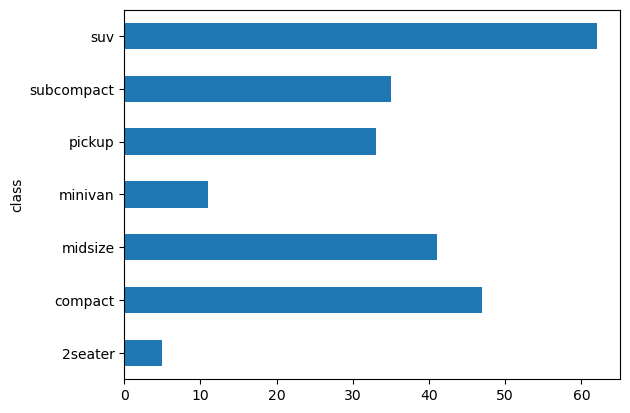

In [41]:
# A vertical bar plot
grouped_counts_onelevel.plot(kind = "bar")
plt.show()

# A horizontal bar plot
grouped_counts_onelevel.plot(kind = "barh")
plt.show()

# Note: (1) Other options in "kind" are "line"
#       (2) plt.show() is used to display the charts as separate plots

<font size = "5">

Multi-level bar chart

In [15]:
grouped_counts_multilevel.unstack("cyl")

cyl,4,5,6,8
class,,,,
2seater,NaN,NaN,NaN,5.0
compact,32.0,2.0,13.0,NaN
midsize,16.0,NaN,23.0,2.0
minivan,1.0,NaN,10.0,NaN
pickup,3.0,NaN,10.0,20.0
subcompact,21.0,2.0,7.0,5.0
suv,8.0,NaN,16.0,38.0


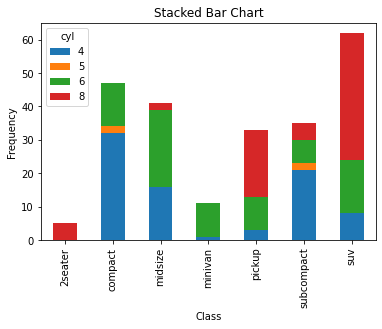

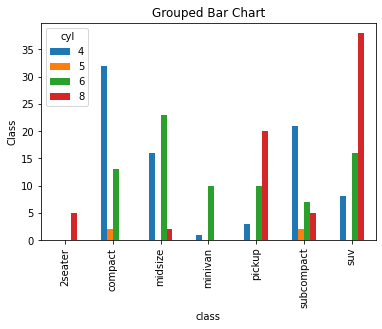

In [16]:
# .unstack("cyl") indicates that the plot should stack the results
# by "cyl" (cylinders).
grouped_counts_multilevel.unstack("cyl").plot(kind = "bar",stacked = True)
plt.title("Stacked Bar Chart")
plt.ylabel("Frequency")
plt.xlabel("Class")
plt.show()

# The grouped bar chart presents a histogram with two groupings, a primary
# and a secondary one. In this case "unstack("cyl")" indicates the secondary
# level
grouped_counts_multilevel.unstack("cyl").plot(kind = "bar",stacked = False)
plt.title("Grouped Bar Chart")
plt.ylabel("Frequency")
plt.ylabel("Class")
plt.show()

<font size = "5">

Legend options

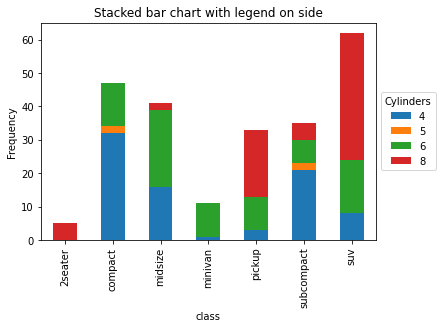

In [17]:
# Baseline plot
grouped_counts_multilevel.unstack("cyl").plot(kind = "bar",stacked = True)
plt.title("Stacked bar chart with legend on side")
plt.ylabel("Frequency")

# bbox_to_anchor(x,y) where (x,y) are the coordinates on the graph where values
#                     between 0 and 1. If the user specifies a value higher
#                     than one, it's put outside the graph.
# loc: The part of the legend where the point "bbox_to_anchor" is located
#      If "bbox_to_anchor" is not specified, this places the legend inside
#      the plot in the desired position.
# Best thing is to use different options to test the usage!

plt.legend(title='Cylinders',
           bbox_to_anchor=(1, 0.5),
           loc='center left',)


<font size = "5">

Try it yourself!

- Compute the standard deviation of "cty" grouped <br>
by "year" and "manufacturer"
- Display a grouped bar chart with "manufacturer" as the <br>
primary level and "year" as the secondary level
- Save the figure to <br>
"results/figure_barchart_stdcty_by_year.png"

In [18]:
# Write your own code
grouped_db = cars.groupby(['year', 'manufacturer'])['cty']

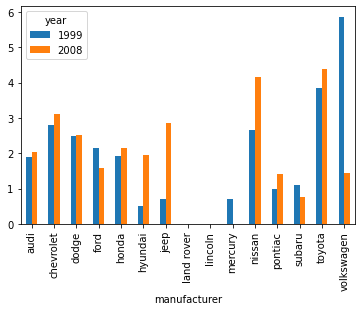

In [19]:
grouped_db.std().unstack('year').plot(kind = "bar", stacked = False)
plt.savefig('results/figure_barchart_stdcty_by_year.png')

# <span style="color:darkblue"> IV. Finishing with style! </span>

<font size = "5" >

More plots!

https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

<font size = "5">

Check available styles

In [20]:
# Check which styles are available
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<font size = "5">

Set style

- ```plt.style.use()```
- Setting this command affects future plots in this file

Text(0.5, 1.0, 'Fuel efficiency in highways vs the city')

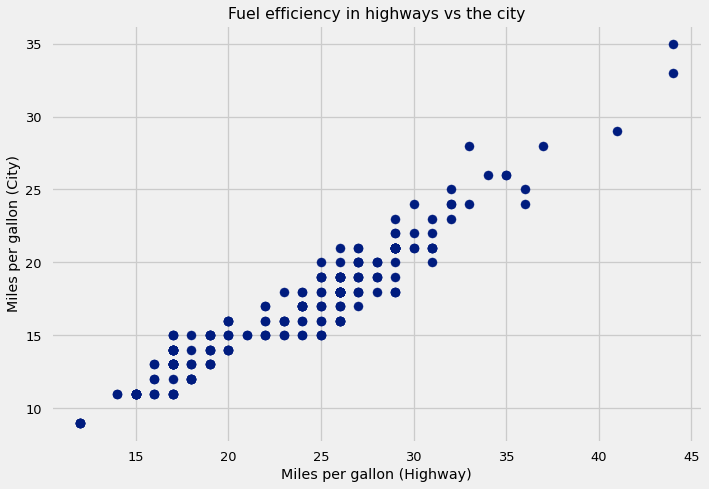

In [23]:
# Set the style. Can switch back by setting:    plt.style.use('default')

plt.style.use('seaborn-talk')

plt.scatter(x = cars["hwy"],y = cars["cty"])
plt.xlabel("Miles per gallon (Highway)")
plt.ylabel("Miles per gallon (City)")
plt.title("Fuel efficiency in highways vs the city")


<font size = "5">

Try it yourself!

- Choose a style with ``` plt.style.use() ```
- Copy-paste the code for one of the plots above <br>
to see the new style

In [15]:
# Write your own code

# <span style="color:darkblue"> V. Where to go from here?  </span>

<font size = "5">

**Key take-away:** Python is modular! <br> (comprised of many simple components)

<font size = "5">

More courses in QTM!

https://quantitative.emory.edu/undergraduate/courses.html

<font size = "5">

Data Camp

https://www.datacamp.com/


<font size = "5">

Course era:

https://www.coursera.org/specializations/python


<font size = "5">

Prepare for coding interviews:

https://leetcode.com/
